# Content based filtering (retrieving data)
This notebook process requests of data movies from "The movies db" API.

## Librarys
Global librarys used in project.

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import gc
from PIL import Image
from io import BytesIO
from collections import ChainMap
from datetime import date
from time import time

## Getting data from API (example)
This section will use one example to show the steps for processing data from API.

### Api initial data

In [2]:
# Api data and movie index example
api_key = "44f9a7f09387a49408460a6d158e1f44"
movie_ex = 20

# URL to retrieve movie info
url = "https://api.themoviedb.org/3/movie/" + \
    str(movie_ex) + "?api_key=" + api_key
print(url)

https://api.themoviedb.org/3/movie/20?api_key=44f9a7f09387a49408460a6d158e1f44


### Request object

In [3]:
# Making a request example
req_obj = requests.get(url)
print("Status code:",req_obj.status_code)

Status code: 200


### Raw dictionary request
We will use json library to load json file from API.

In [4]:
row = json.loads(req_obj.text)
row

{'adult': False,
 'backdrop_path': '/kZyurQjTMLHalUxs7sHgH5XeiwO.jpg',
 'belongs_to_collection': None,
 'budget': 2500000,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}],
 'homepage': 'http://www.clubcultura.com/clubcine/clubcineastas/isabelcoixet/mividasinmi/index.htm',
 'id': 20,
 'imdb_id': 'tt0314412',
 'original_language': 'en',
 'original_title': 'My Life Without Me',
 'overview': 'A fatally ill mother with only two months to live creates a list of things she wants to do before she dies without telling her family of her illness.',
 'popularity': 13.08,
 'poster_path': '/9Fa7tCEKIha1llGH7E41mxSpaF6.jpg',
 'production_companies': [{'id': 49,
   'logo_path': '/xpf5iHdvvBtsH8jBMlgIJHAET0c.png',
   'name': 'El Deseo',
   'origin_country': 'ES'},
  {'id': 77,
   'logo_path': None,
   'name': 'Milestone Productions',
   'origin_country': ''}],
 'production_countries': [{'iso_3166_1': 'CA', 'name': 'Canada'},
  {'iso_3166_1': 'ES', 'name': 'Spain'}],
 'release

### Extract Cover Image for movie example
Extract posther path url.

In [5]:
poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
print("url for cover movie\n",poster_url)
poster_img = requests.get(poster_url)

url for cover movie
 https://image.tmdb.org/t/p/w500/9Fa7tCEKIha1llGH7E41mxSpaF6.jpg


### Plotting Cover Image with Matplotlib

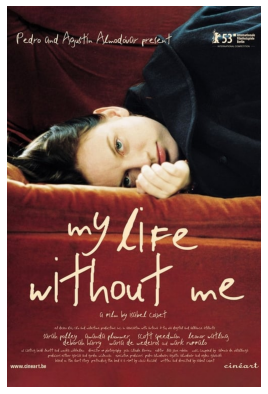

In [6]:
if poster_img.status_code == 200:
    imshow = Image.open(BytesIO(poster_img.content))
    plt.figure(figsize=(7,7))
    plt.axis('off')
    plt.imshow(imshow)
    plt.show()

## Processing dictionary data of movie

### Remove function() for movie
This function remove all atributes below.

In [7]:
#Remove keys
def remove_keys(row:dict):
    """Remove attributes from row dictionary."""
    row.pop("adult")
    row.pop("backdrop_path")
    row.pop("poster_path")
    row.pop("belongs_to_collection")
    #row.pop("genres")
    row.pop("homepage")
    row.pop("imdb_id")
    row.pop("original_language")
    row.pop("overview")
    row.pop("production_companies")
    row.pop("production_countries")
    row.pop("spoken_languages")
    row.pop("status")
    row.pop("video")
    row.pop("tagline")
    row.pop("title")

### Use remove_keys() function
We will use remove_keys() function for data movie example.

In [8]:
remove_keys(row)
row

{'budget': 2500000,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}],
 'id': 20,
 'original_title': 'My Life Without Me',
 'popularity': 13.08,
 'release_date': '2003-03-07',
 'revenue': 12300000,
 'runtime': 106,
 'vote_average': 5.8,
 'vote_count': 364}

### Get all Genres movie dictionary
We take all genre atributes from API to binarize this attribute.

In [9]:
url = "https://api.themoviedb.org/3/genre/movie/list?api_key="+str(api_key)+"&language=en-US"

genres = json.loads(requests.get(url).text)
#Obtain a list of one dict and one genere
genres = genres["genres"]

#We join all genres available in one list
all_genres = {}

for genre in genres:
    all_genres[genre['id']] = genre['name']
    
all_genres

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

### Binary genre function()
Genre attribute has a list format, we need to expand and put in a binary attribute.

In [10]:
def binary_genre(row:list):
    """Convert a list of dictionaries with generes of a movie.
    input: Row is a list of dictionaries."""
    genres_by_movie_dict = {}
    for values in all_genres.values():
        genres_by_movie_dict[values] = 0
        for movie in row:
            if movie["name"] == values:
                genres_by_movie_dict[values] = 1
    return genres_by_movie_dict

### Using binary_genre() function

In [11]:
#Change value of genre attribute
print("Before modify")
print(row["genres"])

Before modify
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]


In [12]:
row_genres = binary_genre(row["genres"])
row_genres

{'Action': 0,
 'Adventure': 0,
 'Animation': 0,
 'Comedy': 0,
 'Crime': 0,
 'Documentary': 0,
 'Drama': 1,
 'Family': 0,
 'Fantasy': 0,
 'History': 0,
 'Horror': 0,
 'Music': 0,
 'Mystery': 0,
 'Romance': 1,
 'Science Fiction': 0,
 'TV Movie': 0,
 'Thriller': 0,
 'War': 0,
 'Western': 0}

### Removing genre attribute list

In [13]:
#Extract original genre format
row.pop("genres")
row

{'budget': 2500000,
 'id': 20,
 'original_title': 'My Life Without Me',
 'popularity': 13.08,
 'release_date': '2003-03-07',
 'revenue': 12300000,
 'runtime': 106,
 'vote_average': 5.8,
 'vote_count': 364}

### Data final for project by row

In [14]:
row_final_process = dict(ChainMap(*[row_genres, row]))
row_final_process

{'budget': 2500000,
 'id': 20,
 'original_title': 'My Life Without Me',
 'popularity': 13.08,
 'release_date': '2003-03-07',
 'revenue': 12300000,
 'runtime': 106,
 'vote_average': 5.8,
 'vote_count': 364,
 'Action': 0,
 'Adventure': 0,
 'Animation': 0,
 'Comedy': 0,
 'Crime': 0,
 'Documentary': 0,
 'Drama': 1,
 'Family': 0,
 'Fantasy': 0,
 'History': 0,
 'Horror': 0,
 'Music': 0,
 'Mystery': 0,
 'Romance': 1,
 'Science Fiction': 0,
 'TV Movie': 0,
 'Thriller': 0,
 'War': 0,
 'Western': 0}

## Getting the movies dataset
We retrieve the data for all movies of the dataset, to do this, we download json dictionary with all movies of dataset.

In [15]:
today = str(date.today().strftime("%m_%d_%Y"))

#Download ids movies at today
print("Download ids movies link")
print("http://files.tmdb.org/p/exports/movie_ids_" + str(today) + ".json.gz")

Download ids movies link
http://files.tmdb.org/p/exports/movie_ids_03_25_2022.json.gz


### Loading raw json dictionary of all movies.

In [16]:
df_movies = pd.read_json("json_dict\movie_ids_03_16_2022.json",lines=True)
df_movies.set_index('id',inplace=True)
df_movies.sort_index(inplace=True)
df_movies.head()

,adult,original_title,popularity,video
id,,,,
2,False,Ariel,9.408,False
3,False,Varjoja paratiisissa,10.931,False
5,False,Four Rooms,13.555,False
6,False,Judgment Night,10.250,False
8,False,Life in Loops (A Megacities RMX),3.416,False


### Movies list dictionary
Only need id and movies name, that's why we will remove no necessary attributes.

In [17]:
df_movies = df_movies['original_title']
df_movies.head(10)

id
2                                Ariel
3                 Varjoja paratiisissa
5                           Four Rooms
6                       Judgment Night
8     Life in Loops (A Megacities RMX)
9                    Sonntag im August
11                           Star Wars
12                        Finding Nemo
13                        Forrest Gump
14                     American Beauty
Name: original_title, dtype: object

In [18]:
#Total movies id length
n = len(df_movies)
print("All movies size is",n)

All movies size is 688316


### Function to retrieve features
This function retrieves all features and makes all process show from the past section.

In [19]:
#Process request function
def process_request(movie_id):
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    request = requests.get(url)
    if request.status_code == 200:
        movie = json.loads(requests.get(url).text)
        remove_keys(movie)
        movie_genres = binary_genre(movie["genres"])
        movie.pop("genres")
        return dict(ChainMap(*[movie_genres,movie]))

### Iterative process configuration
As dataset is large and need sometime to process, we will use a batch iterative process.

In [20]:
# Iteration parameters
n = len(df_movies)  # All movies size
nbatch = 4000       # Number of Batches

# Create index partition
indexs = np.linspace(0, len(df_movies), nbatch, dtype=int)
batch_size = indexs[1]

# Initial batch, stop batch and initial counter (movies)
a = 1001                 # Initiates on batch a -> [1,nbatch]
b = 1002                 # End on batch b -> [1,nbatch]
nbatch_it = b-a+1   # Number of batches to process in iteration
nmovies = batch_size*nbatch_it # Total movies in iteration
counter = 0         # Count iterations movies

# Stop conditions (stop when batch has been processed)
batch_stop = None      # None for no stop

# Print resume configuration
print("------------ Iteration conditions ------------")
print("Total number of batches:",nbatch)
print("Batch size is:",batch_size)
print("Iteration will process from {} to {} batch".format(a,b))
print("Iteration will process {} movies".format(nmovies))
if batch_stop != None:
    print("Stop condition: {} batch".format(batch_stop))

------------ Iteration conditions ------------
Total number of batches: 4000
Batch size is: 172
Iteration will process from 1001 to 1002 batch
Iteration will process 344 movies


### Iterative process action
This part will retrieve data in batch and append to a csv file called "dataset_movies.csv"

In [26]:
start_time = time()
# Iterate batches
for i in range(len(indexs)+1)[a:(b+1)]:
    # Print iteration info
    print('Processing Batch {}/{}.'.format(i, b))
    print('Processed movies {}/{}.'.format(counter, nmovies), end='')
    
    data_list = []
    # Iterate movies batch
    for movie_id in df_movies.index[indexs[i-1]:indexs[i]]:
        # Append row to data list
        data_list.append(process_request(movie_id))
        counter += 1
        # Print iteration counter and status time every 10 iterations
        if counter % 10 == 0:
            print('\rProcessed movies {}/{}. Remaining time: {:5.4f} h'.format(counter,
                  nmovies, np.round((time()-start_time)/(3600*counter)*(nmovies-counter),4)), end='')

    # Remove None values in list
    before = len(data_list)
    data_list = list(filter(None, data_list))
    print("\nNumber of error lines:", before - len(data_list))
    print("------------------------------------------------------")
    
    if i == 1:
        # Append dataframe to csv file with header
        data = pd.DataFrame(data_list)
        data.set_index("id", inplace=True)
        data.to_csv("export_files\dataset_movies.csv")
    else:
        # Append dataframe to csv file without header
        data = pd.DataFrame(data_list)
        data.set_index("id", inplace=True)
        data.to_csv("export_files\dataset_movies.csv",mode="a",header=False)
    
    # del data and clean memory
    del data
    del data_list
    gc.collect()
    
    # Stop condition    
    if i == batch_stop:
        print("Iteration stop condition")
        print("batch {}/{} has been processed".format(i,b))
        print("movie {}/{} has been processed".format(counter,nmovies))
        print("Elapsed time: {} h.".format((time()-start_time)/3600))
        break

if batch_stop == None:
    print("Iteration process complete")
    print("batch {}/{} has been processed".format(i,b))
    print("movie {} has been processed".format(counter))
    print("Elapsed time: {} h.".format((time()-start_time)/3600))

Processing Batch 1001/1002.
Processed movies 170/344. Remaining time: 0.0116 h
Number of error lines: 0
------------------------------------------------------
Processing Batch 1002/1002.
Processed movies 340/344. Remaining time: 0.0003 h
Number of error lines: 0
------------------------------------------------------
Iteration process complete
batch 1002/1002 has been processed
movie 344 has been processed
Elapsed time: 0.023031598925590514 h.


### Loading all processed data from csv file

In [27]:
df = pd.read_csv("export_files\dataset_movies.csv")
df.set_index("id",inplace=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0,Ariel,8.165,10/21/1988,0,73.0,6.8,157,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,Varjoja paratiisissa,8.509,10/17/1986,0,74.0,7.2,158,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98.0,5.7,2127,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110.0,6.5,230,1,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,0,80.0,7.5,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285462,0,Tiya Bening,0.600,2014-08-02,0,12.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285463,0,Dos disparos,0.600,2014-08-11,0,104.0,6.3,9,0,0,...,0,0,0,0,0,0,0,0,0,0
285464,0,Mga Ligaw na Paruparo,0.600,2014-08-02,0,14.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Detecting NA values in dataset

In [28]:
df.isna().sum()

budget              0
original_title      0
popularity          0
release_date        6
revenue             0
runtime            39
vote_average        0
vote_count          0
Action              0
Adventure           0
Animation           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
History             0
Horror              0
Music               0
Mystery             0
Romance             0
Science Fiction     0
TV Movie            0
Thriller            0
War                 0
Western             0
dtype: int64

### Removing duplicates and fill None values

In [29]:
print("Number of movies before removing:",df.shape[0])
df.drop_duplicates(inplace=True)
print("Number of movies after drop duplicates:", df.shape[0])
# Fill NA values with 0
df[["release_date", "runtime"]] = df[["release_date", "runtime"]].fillna(0)

Number of movies before removing: 172437
Number of movies after drop duplicates: 172437


In [30]:
# Check NA values in dataframe
df.isna().sum()

budget             0
original_title     0
popularity         0
release_date       0
revenue            0
runtime            0
vote_average       0
vote_count         0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

### Export clean dataset to csv (update)

In [31]:
# Run to save df without duplicates
df.to_csv("export_files\dataset_movies.csv")